In [1]:
#NAMA : Wahyu Januar Alfian
#NIM  : 202231506
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#MEMBACA DATASET
data = pd.read_csv("sample_data/Obesity.csv")
data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
#MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT X
data = data[['Height', 'Weight']]
data.head(500)

,Height,Weight
0,1.620000,64.000000
1,1.520000,56.000000
2,1.800000,77.000000
3,1.800000,87.000000
4,1.780000,89.800000
...,...,...
495,1.800000,60.000000
496,1.720000,53.000000
497,1.560000,45.000000
498,1.686306,104.572712


In [5]:
#MELIHAT RINGKASAN STATISTIK
data.describe()

,Height,Weight
count,2111.000000,2111.000000
mean,1.701677,86.586058
std,0.093305,26.191172
min,1.450000,39.000000
25%,1.630000,65.473343
50%,1.700499,83.000000
75%,1.768464,107.430682
max,1.980000,173.000000


<ipython-input-6-2e68b12b0f71>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data['Height'], data['Weight']],


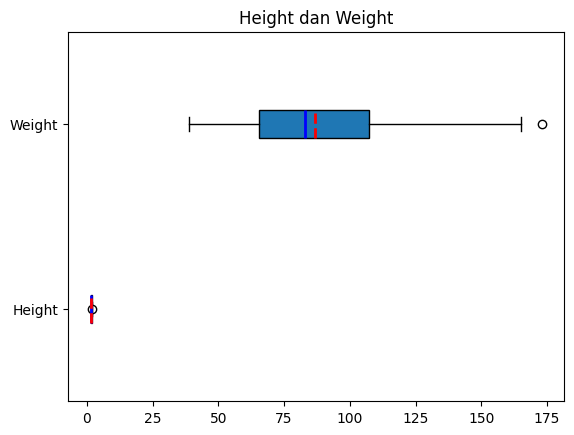

In [6]:
fig, ax = plt.subplots()
ax.boxplot([data['Height'], data['Weight']],
           vert=False,
           showmeans=True,
           meanline=True,
           labels=('Height', 'Weight'),
           patch_artist=True,
           medianprops={'linewidth': 2, 'color':'blue'},
           meanprops={'linewidth': 2, 'color':'red'})
plt.title('Height dan Weight')
plt.show()

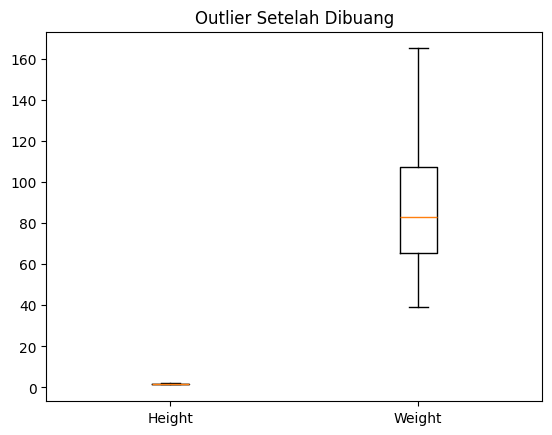

In [8]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

# BOX PLOT SETELAH OUTLIER DIBUANG
plt.boxplot([data['Height'], data['Weight']])
plt.xticks([1, 2], ['Height', 'Weight'])
plt.title('Outlier Setelah Dibuang')
plt.show()


In [9]:
data.describe()

,Height,Weight
count,2108.000000,2108.000000
mean,1.701335,86.510657
std,0.092910,26.118033
min,1.450000,39.000000
25%,1.630000,65.408942
50%,1.700198,82.983969
75%,1.768232,107.135880
max,1.947406,165.057269


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2108 entries, 0 to 2110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  2108 non-null   float64
 1   Weight  2108 non-null   float64
dtypes: float64(2)
memory usage: 49.4 KB


In [11]:
#MEMBUAT NILAI X
x_array = np.array(data)

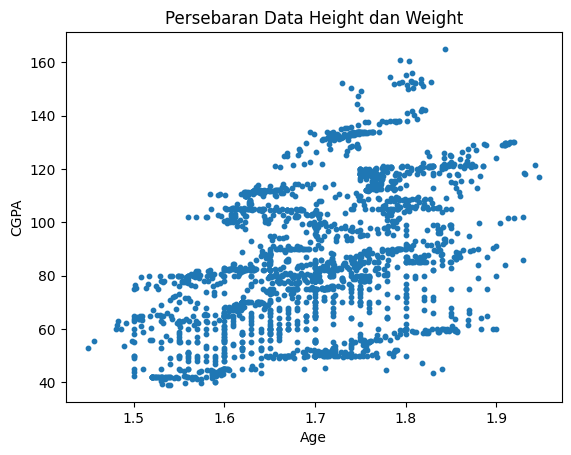

In [12]:
# VISUALISASI PERSEBARAN DATA
plt.scatter(data['Height'], data['Weight'], s=10)
plt.title('Persebaran Data Height dan Weight')
plt.xlabel('Age')
plt.ylabel('CGPA')
plt.show()

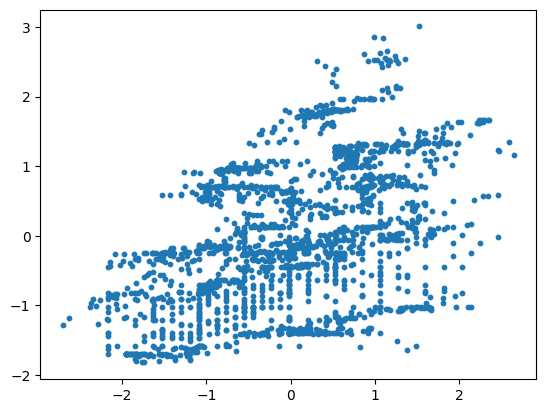

In [14]:
#STANDARISASI
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0],x_scaled[:,1],s=10)
plt.show()

In [15]:
#cek sum of square error dari tiap pembagian jumlah cluster
from sklearn.cluster import KMeans
sse = []
index = range (1,10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i, sse_)

1 4215.999999999996
2 2182.9480002387745
3 1567.4116369301119
4 1054.9404050169517
5 889.1526072480268
6 748.3252197040151
7 630.6639282459485
8 527.6266368557683
9 460.2228281078827


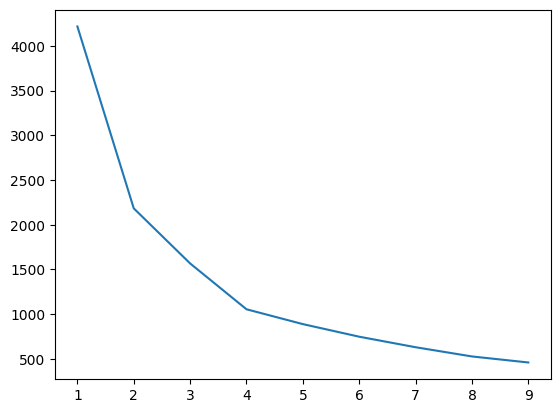

In [16]:
plt.plot(index, sse)
plt.show()

In [17]:
#MEMBUAT MODEL
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [18]:
#MELIHAT CLUSTER PUSAT
kmeans.cluster_centers_

array([[ 0.03058801, -0.17000305],
       [ 0.99708065,  1.11465131],
       [-1.2178881 , -0.97548278]])

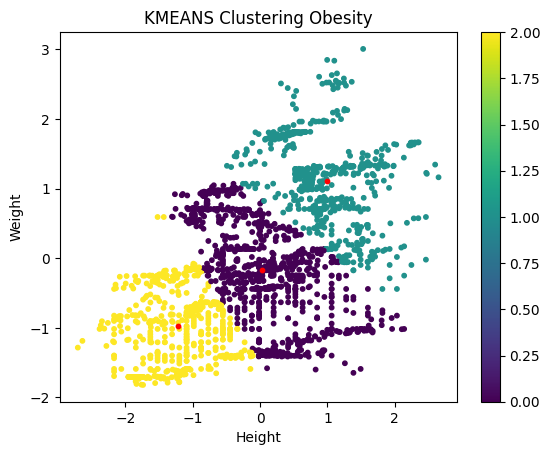

In [19]:
#VISUALISASI PERSEBARAN DATA SETELAH KLASTERING
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10, c=kmeans.labels_)
centers = kmeans.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c='red', s=10)
plt.title("KMEANS Clustering Obesity")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.colorbar(output)
plt.show()

In [20]:
#evaluasi model
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.9931907991994219